In [15]:
from __future__ import division
import numpy as np
from custom_cartpole import get_cartpole_rewards
from Utils import plot_avg_cumulative_reward
%matplotlib inline

nEpisodes = 1000

### Question 1

In [16]:
#generate plots for different number of steps before target network update
reward_target_upd_step = []
episodes_to_solve_upd_steps = np.zeros([4], dtype=int)
plot_legend = []
for idx,steps in enumerate(list([1000, 250, 50, 1])):
    cumulative_reward,episodes_to_solve_upd_steps[idx] = get_cartpole_rewards(target_net_upd_steps=steps,nEpisodes=nEpisodes)
    reward_target_upd_step.append(cumulative_reward)
    plot_legend.append('update steps: {}'.format(steps))
    print ("[DEBUG] to_solve: {}, steps before target net update: {}".format(episodes_to_solve_upd_steps[idx], steps))
print ("Episodes to Solve for different update steps: {}".format(episodes_to_solve_upd_steps))

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
[DEBUG] to_solve: 819, steps before target net update: 1000
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
[DEBUG] to_solve: 457, steps before target net update: 250
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
[DEBUG] to_solve: 0, steps before target net update: 50
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
[DEBUG] to_solve: 0, steps before target net update: 1
Episodes to Solve for different update steps: [819 457   0   0]


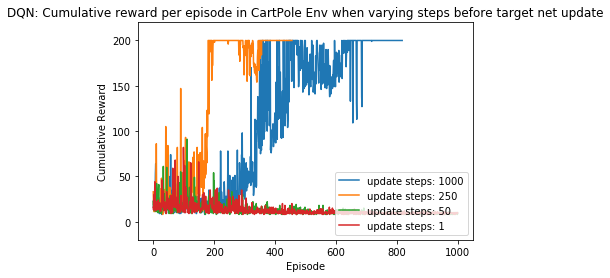

In [17]:
#Original graph of cumulative reward per episode when running with different value of target_net_upd_steps
plot_title = "DQN: Cumulative reward per episode in CartPole Env when varying steps before target net update"
plot_avg_cumulative_reward(reward_target_upd_step, plot_legend, plot_title, None)

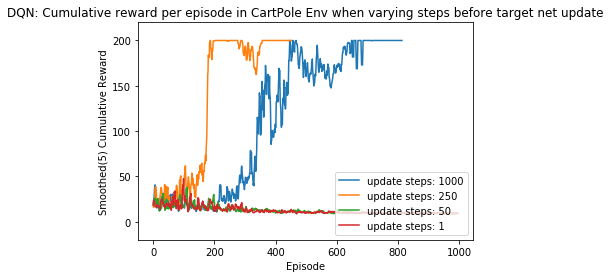

In [18]:
#Smoothed graph of cumulative reward per episode using moving average with window n=5
plot_avg_cumulative_reward(reward_target_upd_step, plot_legend, plot_title, None, smooth=True, n=5)

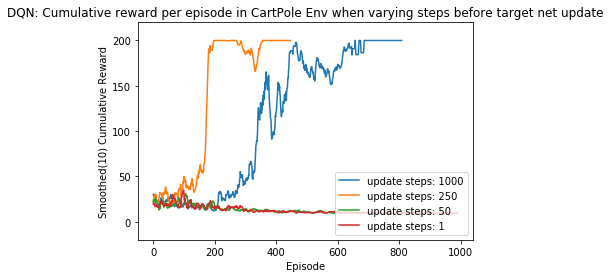

In [19]:
#Smoothed graph of cumulative reward per episode using moving average with window n=10
plot_avg_cumulative_reward(reward_target_upd_step, plot_legend, plot_title, None, smooth=True, n=10)

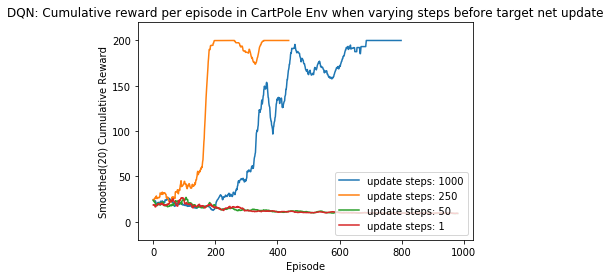

In [20]:
#Smoothed graph of cumulative reward per episode using moving average with window n=20
plot_avg_cumulative_reward(reward_target_upd_step, plot_legend, plot_title, None, smooth=True, n=20)

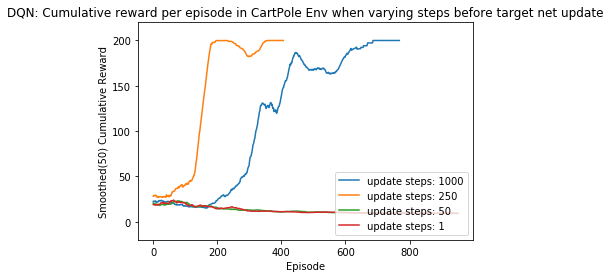

In [21]:
#Smoothed graph of cumulative reward per episode using moving average with window n=50
plot_avg_cumulative_reward(reward_target_upd_step, plot_legend, plot_title, None, smooth=True, n=50)

The above graphs show the result of the DQN algorithm training on Cart Pole Environment. The cumulative reward is computed over at most 1000 episodes or until convergence. The first graph shows the original output and the following graphs show the smoothed out curve using moving average with $(n=5, 10, 20, 50)$.

The DQN algorithm requires $(819,457,>1000,>1000)$ steps to converge to the optimal policy when the number of steps before target network update is $(1000,250,50,1)$. This is confirmed from the cumulative reward graphs above that the curves with $update steps=50,1$ never converged with cumulative reward of $200$.
The target network is the target values the evaluation network is trying to achieve. Thus keeping a static target network for longer durations of the training episode greatly helps the convergence the DQN. The number of steps before target network update is a hyper-parameter and should be determined using cross-validation for individual environments. We can see that reducing the $update steps=250$, we are able to achieve a better convergence time in $457$ steps. However, reducing the number of $update steps=50,1$ results in DQN diverging. With small number of steps before each target network update generates a moving target for the evaluation network and we are never able to converge (non-linear approximation of Q-function) within $1000$ steps (although judging by the slope of the graphs, we might never achieve convergence).

In value iteration we use the estimates of the previous time-step to compute the value function estimate of the current time step.
This is similar in tabular Q-learning where the Q-function from previous time-step (which is kept fixed during the update of the current time step) is used to generate the Q-function for the current time step. The difference between tabular Q-learning and value iteration is that the transition function of the environment is not known/required for Q-learning.
The same concept is seen in DQN (Deep Q-Networks) which is a non-linear function approximation of the Q-function. The target network/(function approximation) in the gradient update equation of 'gradient Q-learning or DQN' is basically the value function from the previous time-step. If we performed a linear approximation using target network, there wouldn't be a need to tune the hyper-parameter for number of steps before we update the target network. However, because of the non-linear approximation, updating the target Q-function every time step can lead to divergence as the network can fall into a feedback loop between the target and the evaluation network.
Thus keeping the weights of the target network fixed for longer periods of time helps in reducing the divergence. The period of fixed target network weights is a hyper-parameter which needs to be tuned for each environment.

### Question 2

In [22]:
#generate plots for different number of mini-batch size for update using replay buffer
reward_mini_batch_size = []
episodes_to_solve_batch_size = np.zeros([4])
plot_legend2 = []
for idx,size in enumerate(list([32,15,5,1])):
    cumulative_reward,episodes_to_solve_batch_size[idx] = get_cartpole_rewards(mini_batch_sample_size=size,nEpisodes=nEpisodes)
    reward_mini_batch_size.append(cumulative_reward)
    plot_legend2.append('mini-batch size: {}'.format(size))
    print ("[DEBUG] to_solve: {}, mini-batch size used: {}".format(episodes_to_solve_batch_size[idx], size))
print ("Episodes to Solve with different mini batch size: {}".format(episodes_to_solve_batch_size))

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
[DEBUG] to_solve: 925.0, mini-batch size used: 32
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
[DEBUG] to_solve: 788.0, mini-batch size used: 15
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
[DEBUG] to_solve: 0.0, mini-batch size used: 5
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
[DEBUG] to_solve: 0.0, mini-batch size used: 1
Episodes to Solve with different mini batch size: [925. 788.   0.   0.]


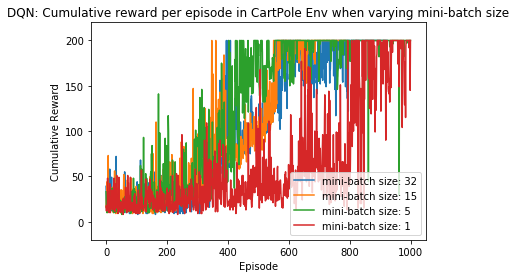

In [23]:
#Original graph of cumulative reward per episode when running with different value of mini_batch_sample_size
plot_title2 = "DQN: Cumulative reward per episode in CartPole Env when varying mini-batch size"
plot_avg_cumulative_reward(reward_mini_batch_size, plot_legend2, plot_title2, None)

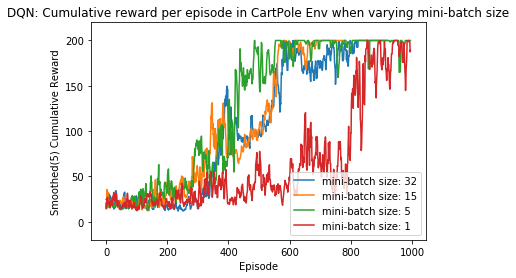

In [28]:
#Smoothed graph of the cumulative reward per episode using moving average window (n=5)
plot_avg_cumulative_reward(reward_mini_batch_size, plot_legend2, plot_title2, None, smooth=True, n=5)

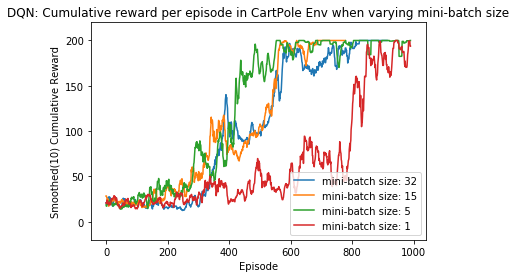

In [29]:
#Smoothed graph of the cumulative reward per episode using moving average window (n=10)
plot_avg_cumulative_reward(reward_mini_batch_size, plot_legend2, plot_title2, None, smooth=True, n=10)

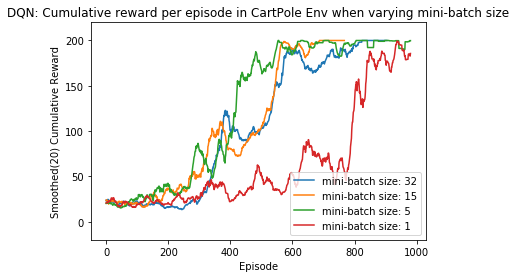

In [30]:
#Smoothed graph of the cumulative reward per episode using moving average window (n=20)
plot_avg_cumulative_reward(reward_mini_batch_size, plot_legend2, plot_title2, None, smooth=True, n=20)

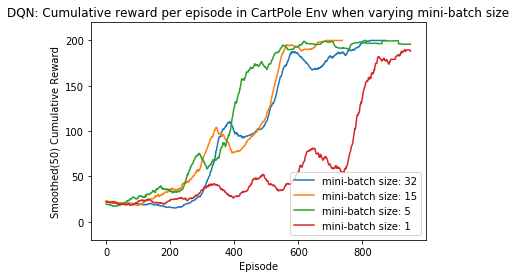

In [31]:
#Smoothed graph of the cumulative reward per episode using moving average window (n=50)
plot_avg_cumulative_reward(reward_mini_batch_size, plot_legend2, plot_title2, None, smooth=True, n=50)

The above graphs show the result of using different size of mini-batch update when updating the evaluation network. The first graph in Question 2 is the original graph produced from the DQN algorithm. The later graphs show the smoothed out curves using moving average with $(n=5,10,20,50)$.
The results show that the training with mini-batch size of $(32,15)$ were able to converge. The training of DQN with mini-batch size of $5$ came very close to convergence in $1000$ episodes. However, the graph of mini-batch size $1$ never came close to convergence.

The total number of episodes required to converge are $[925,788,>1000,>1000)$ for a variation in mini-batch size of $(32,15,5,1)$. The mini-batch is a sample of $(state,action,state^p,reward)$ quadruples which are sampled from the experience replay buffer for each training phase of the evaluation network. Using a larger experience buffer means that a larger batch is used to train the neural network in one-shot. This means that the approximation of the Q-function for those samples of the environment will be well represented by the current network. This might mean that the other quadruples which were not a part of the mini-batch might suffer regression in their Q-function value approximation. Thus as the number of samples used to train the evaluation network are reduced, we immediately see an increase in the number of episodes requried for convergence. With very low values of mini-batch size, we see a large fluctuation in the cumulative reward as the evaluation network's approximation of Q-function of non-sampled values keeps suffering while only a small amount of samples see improvement in the approximated value.

In exact gradient decent or batch gradient decent (running GD on complete training set of size n) the weights to minimize our objective function are updated after a complete pass over the traning set.
However with stochastic gradient decent or mini-batch gradient decent (deployed in DQN) the weights are updated after a pass over a subset of samples of training set of size $k$, where $1<k<n$.
DQN employs a mini-batch gradient decent technique over using exact gradient decent (pass over complete training set) to reduce complexity cost of training every step with the complete training set. Using the complete training set every time will also introduce over-fitting in the network which will cause worse results than a more generalized network.
DQN also doesn't use stochastic gradient decent (pass over each sample of training set individually and update weights) because when the mini-batch is too small, the network might not converge or take a very long time to converge. This can be because an update to the Q-function approximator (neural network) for a single sample will improve the prediction for the current sample, but it will adversly affect the performance of the Q-function approximator (neural network) for other samples of the environment.